# Mini-Projet : Rétrogradation de Mars - Compte-rendu

## I. Introduction

Depuis la nuit du temps, l'Homme observe la voûte célèste dans la quête d'une compréhension des lois de la nature : c'est dans ce cadre que le **mouvement rétrograde de Mars**, occurant à intervalles réguliers d'environ 2 ans, a été décrit. Contrairement à la vision du système solaire qu'avait développée Ptolémée, basée sur le principe des épicycles, l'origine de ce mouvement est lié au "dépassement" de Mars par la Terre, dans le référentiel héliocentrique. Tout au long de ce mini-projet, nous metterons en oeuvre nos compétences mathématique et informatique dans l'optique de modéliser ce phénomène. Nous confronterons par la suite le modèle déduit aux données mesurées, et en déduirons sa pertinence dans le contexte étudié. 

Avant de débuter l'exercice de modélisation, il est nécessaire de rappeler les formules et informations clés du problème.

### a) Equations du mouvement

Pour un mouvement **circulaire uniforme** de rayon $R$, de période $T$ et de phase à l'origine $\phi$, les équations du mouvement sont : 

>$X(t) = R \cos \left( \frac{2\pi}{T} t + \phi \right)$

>$Y(t) = R \sin \left( \frac{2\pi}{T} t + \phi \right)$

A `t = 0`, nous déduisons des équations que l'objet pointe dans une direction d'angle $\phi$.

### b) Expression de la longitude écliptique

La longitude écliptique $\theta$ d'un corps C de coordonnées $(X, Y)$ dans le référentiel héliocentrique, vue depuis la Terre de coordonnées $(X_T, Y_T)$, vaut :

>$\theta(t) = \arctan \left( \frac{Y(t) - Y_T(t)}{X(t) - X_T(t)} \right)$

### c) Constantes du problème

Les grandeurs utiles que nous utiliserons pendant notre effort de modélisation sont les suivantes :

- Le rayon de l'orbite terrestre : $R_T = 1$ UA ;
- la période de révolution terrestre : $T_T = 365.256$ jours ;
- le rayon de l'orbite martienne ; $R_M = 1.52371$ UA ;
- la période de révolution martienne : $T_M = 686.885$ jours ;
- la longitude de Mars au 25 mai 2016 : $\theta_M = 240.5$°.

## II. Extraction et repésentation des données observationnelles

Les données que nous utiliserons pour tester le modèle ont été accumulées dans le fichier `DataMars.csv` entre 2015 et 2017. Il contient les coordonnées de la position de Mars en **coordonnées écliptiques** (longitude et latitude), c'est-à-dire considérant comme plan de référence celui de l'écliptique et comme origine le centre de la Terre, en fonction de la date.

Nous utiliserons les bibliothèques *NumPy* et *Pandas*, ainsi que le sous-module *Matplotlib.pyplot* afin de manipuler ces données.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

S'ensuit ensuite l'extraction et le traitement des données.

In [31]:
# Lecture des données du fichier DataMars.csv
data = pd.read_csv("DataMars.csv", comment='#')

# Extraction du temps et de la longitude
temps_data = pd.to_datetime(data['Date'])
long = data['Longitude (decimal)']

# Définition des bornes de la plage de temps à exploiter
debut = pd.to_datetime('2015-09-26')
fin = pd.to_datetime('2016-11-26')

Finalement, nous représentons les données sur un graphe en fonction du temps.

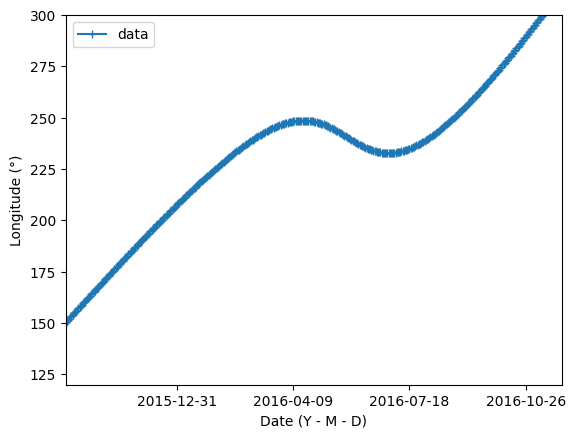

In [32]:
# Construction du graphe
fig, ax = plt.subplots()
ax.plot(temps_data, long, label = 'data', marker = '+')

# Mise en forme des abscisses et ordonnées
plt.xlim(debut, fin)
plt.ylim(120, 300)
plt.xlabel("Date (Y - M - D)")
plt.ylabel("Longitude (°)")

# Limiter le nombre de graduations pour rendre le graphe plus lisible
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.set_major_locator(plt.MaxNLocator(8))

ax.legend()
plt.show()

## III. Construction du modèle

Maintenant que nous avons mis en forme et représenté les données observationnelles, nous allons constuire le modèle associé. Pour ce faire, nous allons travailler avec le plan de l'écliptique, **bidimensionnel**, sur lequel évoluent la Terre et Mars autour du Soleil sous la forme d'orbites circulaires uniformes. A partir de ce modèle, nous serons en mesure de calculer la **longitude** $\theta$ de Mars vue depuis la Terre, donc dans le référentiel géocentrique, en fonction du temps.

In [35]:
# Définition du temps sur un échantillon de 900 jours
t = np.linspace(0, 899, 900)
N = t.size

# Définition des constantes
Orbite_T = np.ones(N)
Orbite_M = np.ones(N) * 1.52371
Periode_T = np.ones(N) * 365.256
Periode_M = np.ones(N) * 686.885

# Equations du mouvement

X_Terre = Orbite_T * np.cos((2*np.pi/Periode_T)*t + 158.5*np.pi/180)
Y_Terre = Orbite_T * np.sin((2*np.pi/Periode_T)*t + 158.5*np.pi/180)

X_Mars = Orbite_M * np.cos((2*np.pi/Periode_M)*t + np.pi/2)
Y_Mars = Orbite_M * np.sin((2*np.pi/Periode_M)*t + np.pi/2)

Nous reviendrons plus tard sur les valeurs des phases à l'origine $\phi_M=158.5$° et $\phi_T=90$°.

In [36]:
# Projection de la distance entre la Terre et Mars TM(t) sur les axes x et y

TMx = X_Mars - X_Terre
TMy = Y_Mars - Y_Terre

# Caractérisation de la longitude theta en fonction des projections de TM(t)
theta = (np.arctan2(TMy, TMx)+np.pi)*180/np.pi

Afin que la longitude soit toujours positive, nous avons ajouté $\pi$ au calcul de $\theta$. Comme le centre de la boucle est de longitude 240.5°, à la date du 25 mai 2016, nous cherchons l'indice i de
$\theta[i]$ tel que $\theta[i] = \theta_M$ approximativement. Pour cela, nous utilisons la fonction `.where()` de NumPy, avec les conditions $\theta < 240.75$° et $\theta > 240.25$°, afin d'obtenir un tableau des indices les remplissant.

In [37]:
indice = np.where((theta < 240.75) & (theta > 240.25))[0]
print(indice)

[ 15 556 633 704 705]


Nous déterminons graphiquement l'indice approprié.

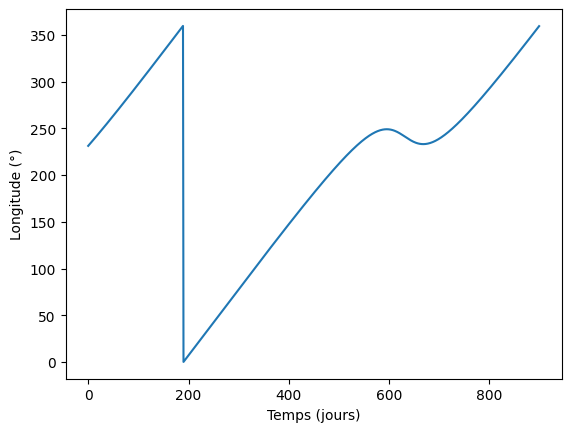

In [38]:
plt.plot(t, theta)
plt.xlabel("Temps (jours)")
plt.ylabel("Longitude (°)")
plt.show()

Nous observons effectivement 5 intersections pour $\theta = 240.5$° : la seule d'entre elles correspondant au centre de la boucle de rétrogradation correspond au jour 633. nous en déduisons donc que $\theta[633] = 240.5$°

Nous vérifions maintenant les phases à l'origine des équations de mouvement, choisies plus tôt, avec la donnée du centre de la boucle, en `t = 633`. A cette configuration , les deux planètes considérées et le soleil sont alignés : l'angle $\phi_T$ doit donc être sous la forme $\phi_M + 2\pi n$, où $n$ est un entier.

In [39]:
print(f"Pour la Terre : {((2*np.pi/Periode_T[633])*633 + 158.5*np.pi/180):.2f} rad")
print(f"Pour Mars : {((2*np.pi/Periode_M[633])*633 + np.pi/2):.2f} rad")

Pour la Terre : 13.66 rad
Pour Mars : 7.36 rad


Nous constatons que $\phi_T = \phi_M + 2\pi$, ce qui correspond à l'équation mentionnée ci-dessus, avec $n=1$ : les phases à l'origine données permettent donc le respect de cette condition.
De même, nous définissons l'origine des temps comme la date du centre de la boucle, à laquelle nous soustrayons 633 jours : de cette manière, la date du modèle sera synchronisée avec celle des données.

In [41]:
origine_t = np.datetime64('2016-05-25') - np.timedelta64(633, 'D')
print("La date d'origine est :", origine_t)

# Définition du temps propre au modèle en partant de la date d'origine
temps_model = pd.to_datetime(t, unit = 'd', origin = origine_t)

La date d'origine est : 2014-08-31


Enfin, nous représentons les données du modèle sur un graphe en fonction du temps.

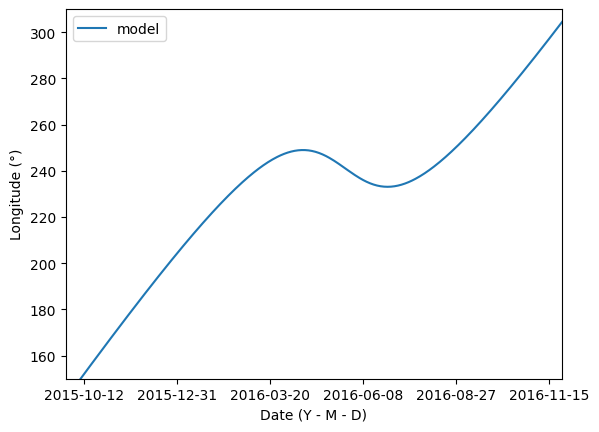

In [42]:
# Construction du graphe
fig1, ax1 = plt.subplots()
ax1.plot(temps_model, theta, label = 'model')

# Mise en forme des abscisses et ordonnées
plt.xlabel("Date (Y - M - D)")
plt.ylabel("Longitude (°)")
plt.xlim(debut, fin)
plt.ylim(150, 310)

# Limiter le nombre de graduations pour rendre le graphe plus lisible
ax1.xaxis.set_major_locator(plt.MaxNLocator(6))
ax1.yaxis.set_major_locator(plt.MaxNLocator(8))

plt.legend()
plt.show()

## IV. Confrontation du modèle aux données observationnelles

Maintenant que les données du fichier `DataMars.csv` ont été exploitées, et que le modèle a été créé et synchronisé avec les conditions initiales de la situation observationnelle, nous devons confronter ces deux parties. Pour cela, nous allons procéder à une comparaison graphique.

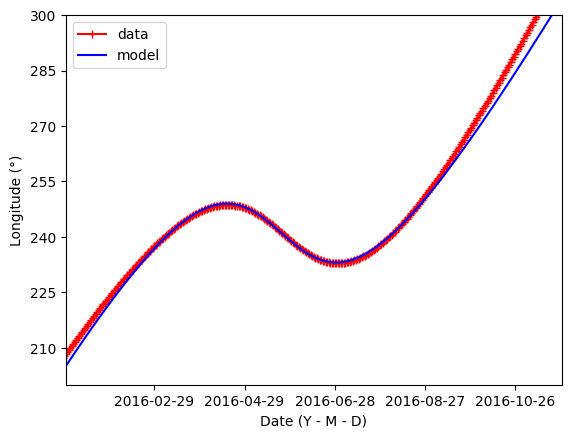

In [43]:
# Construction des graphes
fig2, ax2 = plt.subplots()
ax2.plot(temps_data, long, label = 'data', marker = '+', color = 'r')
ax2.plot(temps_model, theta, label = 'model', color = 'b')

# Nous reserrons l'intervalle temporel en abscisses
debut_sup = pd.to_datetime('2016-01-01')
fin_sup = pd.to_datetime('2016-11-26')

# Mise en forme des abscisses et ordonnées
ax2.xaxis.set_major_locator(plt.MaxNLocator(6))
ax2.yaxis.set_major_locator(plt.MaxNLocator(8))
plt.xlabel("Date (Y - M - D)")
plt.ylabel("Longitude (°)")
plt.xlim(debut_sup, fin_sup)
plt.ylim(200, 300)

plt.legend()
plt.show()

Nous observons que les allures des courbes d'évolution de la longitude écliptique lors du mouvement rétrograde de Mars sont **quasi-identiques**. Concernant les évolutions croissantes de part et d'autre du mouvement retrograde cependant, malgré une tendance **similaire** en comparaison aux données observationnelles, nous constatons de **légères déviations** : la longitude augmente plus rapidement avant le mouvement retrograde, tandis qu'elle augmente plus lentement après ce dernier.

## V. Conclusion

Il est important de rappeler que le modèle ici créé est idéal : nous avons effectivement fait les hypothèses que les deux orbites sont circulaires uniformes, mais également contenues intégralement dans le plan de l'écliptique (latitude nulle). Ces paramètres n'étant pas vérifiés en réalité, il est donc normal de constater des disparités entre les résultats du modèle et les données observationnelles : cependant, comme nous l'avons observé dans la partie précédente, les résultats du modèle sont très satisfaisants dans le cadre de l'étude du mouvement rétrograde de Mars.